In [1]:
import pandas as pd
import re

In [2]:
# Load your dataset

df = pd.read_csv('D:/Project-Fake_news_classifier/data/processed/fake_news_eda.csv')

In [3]:
df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
#lower the text column
df['processed_text'] = df['text'].str.lower()

In [5]:
#Applying the regular expression to text column
df['processed_text'] = df['processed_text'].str.replace(r'[^\w\d\s]','')

In [6]:
import spacy

# Load the spaCy model with NER enabled
nlp = spacy.load("en_core_web_sm", disable=["tok2vec", "tagger", "parser", "attribute_ruler"])


# Function to process text (including NER and replacing named entities with their tags)
def process_text(text):

    doc = nlp(text)

    # Create a list of tokens, replacing named entities with their entity labels
    cleaned_tokens = [
        token.lemma_ if token.ent_type_ == '' else f"<{token.ent_type_}>" 
        for token in doc
        if not token.is_stop and not token.is_punct
    ]
    
    return " ".join(cleaned_tokens)

In [7]:
df['cleaned_text'] = df['processed_text'].apply(process_text)

d:\Project-Fake_news_classifier\venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


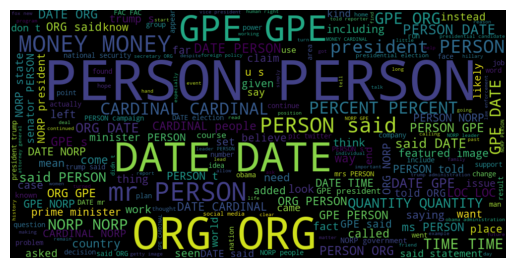

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['cleaned_text'])

wordcloud = WordCloud(width=1000,height=500,background_color='black').generate(text)

plt.Figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
df.head()

,text,label,processed_text,cleaned_text
0,No comment is expected from Barack Obama Membe...,1,no comment is expected from barack obama membe...,comment expected barack obama members fyf911 <...
1,Did they post their votes for Hillary already?,1,did they post their votes for hillary already?,post votes hillary
2,"Now, most of the demonstrators gathered last ...",1,"now, most of the demonstrators gathered last ...",demonstrators gathered <TIME> exercising con...
3,A dozen politically active pastors came here f...,0,a dozen politically active pastors came here f...,<CARDINAL> politically active pastors came pri...
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"the rs-28 sarmat missile, dubbed satan 2, will...",<ORG> sarmat missile dubbed satan <CARDINAL> r...


In [10]:
df.to_csv('D:/Project-Fake_news_classifier/data/processed/fake_news_cleaned.csv', index=False)